In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression

In [2]:

data = pd.read_excel("/content/Crude Oil Prices Daily.xlsx")

In [3]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [6]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data_oil = data.reset_index()['Closing Value']

In [11]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [12]:

from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
data_oil = scaler.fit_transform(np.array(data_oil).reshape(-1,1))

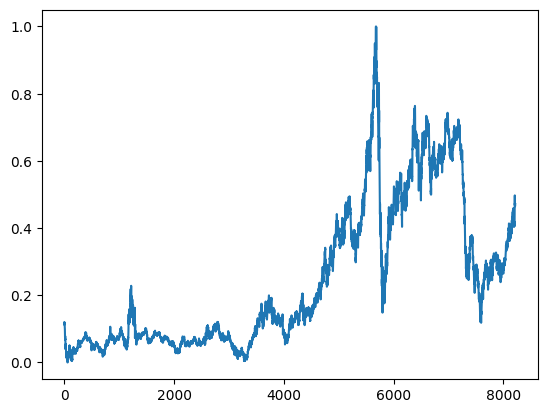

In [14]:
plt.plot(data_oil)

In [15]:
training_size = int(len(data_oil)*0.65)
test_size = len(data_oil)-training_size
train_data,test_data = data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [16]:
training_size,test_size

(5340, 2876)

In [17]:
train_data.shape

(5340, 1)

In [19]:

def create_dataset(dataset,time_step=1):
  dataX,dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [21]:

time_step = 10
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [22]:
print(X_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [23]:
print(X_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [24]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [25]:

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [26]:

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
from tensorflow.keras.layers import LSTM

In [31]:


model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [32]:

model.add(Dense(1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:

model.compile(loss = 'mean_squared_error',optimizer='adam')

In [36]:

model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 12s 53ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 2/50
84/84 [==============================] - 3s 33ms/step - loss: 1.3217e-04 - val_loss: 8.3425e-04
Epoch 3/50
84/84 [==============================] - 2s 30ms/step - loss: 1.2898e-04 - val_loss: 8.2206e-04
Epoch 4/50
84/84 [==============================] - 2s 30ms/step - loss: 1.2769e-04 - val_loss: 0.0012
Epoch 5/50
84/84 [==============================] - 2s 29ms/step - loss: 1.3082e-04 - val_loss: 0.0010
Epoch 6/50
84/84 [==============================] - 4s 44ms/step - loss: 1.3184e-04 - val_loss: 8.9822e-04
Epoch 7/50
84/84 [==============================] - 3s 30ms/step - loss: 1.2112e-04 - val_loss: 0.0010
Epoch 8/50
84/84 [==============================] - 2s 30ms/step - loss: 1.1960e-04 - val_loss: 9.2036e-04
Epoch 9/50
84/84 [==============================] - 2s 29ms/step - loss: 1.1398e-04 - val_loss: 8.3364e-04
Epoch 10/50
84/84 [==============================] - 3s 

In [41]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)

90/90 [==============================] - 1s 7ms/step


In [42]:

test_predict=scaler.inverse_transform(test_predict)

In [46]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train, train_predict))


In [47]:
rmse

29.457963025321156

In [44]:

from tensorflow.keras.models import load_model
model.save("model.h5")

NameError: ignored

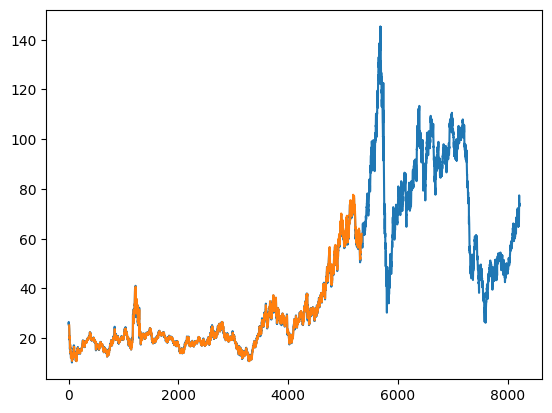

In [48]:
look_back=10

trainpredictPlot = np.empty_like(data_oil)

trainpredictPlot[:, :]= np.nan

trainpredictPlot [look_back: len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting

testPredictplot = np.empty_like(data_oil)

testPredictplot[:, :] = np.nan

testPredictplot[len (train_predict)+(look_back*2)+1:len (data_oil)-1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(data_oil))

plt.plot(trainpredictPlot)

plt.plot(testPredictPlot)

plt.show()